# **Course Notes- Guy Donagi**

## Imports

In [ ]:
# Week 1
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

# Week 2
import glob
from skimage import img_as_float

# Week 3
import cv2
import os
import shutil

# Week 4
import scipy.ndimage as ndi
from skimage import data # Is used for showing stock photos from skimage library
from skimage import filters # And more specifically:
from skimage.filters import unsharp_mask
from skimage.filters import gaussian
from skimage.morphology import disk # Structuring element
from skimage import img_as_ubyte
from skimage.restoration import denoise_nl_means, estimate_sigma

# Week 5
from skimage.filters import threshold_multiotsu
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Week 6
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
import imutils
from scipy.spatial import Voronoi, voronoi_plot_2d

#  Aruco
from skimage import measure, io, img_as_ubyte, morphology, util, color
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import pandas as pd
import cv2
import imutils

#  ML

import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

## A function to display an image.
First, you will need to define a path for the image.

In [ ]:
def display(img): # Displays the image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
img_path = '/some/path/img.jpg'

# Reading the image
img = io.imread(img_path)

## Using the nparray.shape / .reshape attribute
It is used to extract the image's height/width/number of channels.

In [ ]:
arr = np.array([[1, 2, 3, 4],
                [5, 6, 7, 8],
                [9,10,11,12]])

print(arr.shape) # Will print a tuple consists of rows, columns, and depth (if it exists).
print(arr[1])# Printing the second row
arr = arr.reshape((1,12)) # Reshaping an array, NOTICE THE DOUBLE PARENTHESIS
print(arr)
print()

# Example
img = np.zeros((30,40,3))
height, width = img.shape[:2] # Assigning height and width with the shape attribute (for a three channeled image).
height = int(height) # Converting to int.
width = int(width) # Converting to int. 
print("The image's height is", height ,"px.")
print("The image's width is", width ,"px.")

number_of_channels = img.shape[2] # Getting the amount of channels using the shape attribute
print("The image's bit depth is",number_of_channels, "channels.")

(3, 4)
[5 6 7 8]
[[ 1  2  3  4  5  6  7  8  9 10 11 12]]

The image's height is 30 px.
The image's width is 40 px.
The image's bit depth is 3 channels.


## Getting the depth of an image
Depth - How many bits does it take to represent the colors in the given image.

In [ ]:
print(img.dtype)

float64


## Cropping an image

In [ ]:
specificRegion = img[ :1100,:] # Cropping the pixels form the top until the 
display(specificRegion)

## Making a copy of an image

In [ ]:
img_copy = img.copy() # We need to make copies of our images in order to manipulate them.

## Extracting a certain channel from an image

In [ ]:
img_copy = img.copy() # Making a copy of the original image in order to make my changes on it
redOnly = img[:,:,0] # Assigning a new value to the copy, consisting of the red channel only

##Saving an image to a desired path

In [ ]:
io.imsave(fname = '/some/path/redOnly.jpg', arr=redOnly) # Saving an image

##Matrix operations with numpy

In [ ]:
np.transpose(img) # Transposing an image
# Dot product. Note that the number of rows in the first image needs to match the number of columns of the second image.
myDotProduct = np.dot(someChannel, np.transpose(otherChannel))

img.sum() # Sums our matrix
img.mean() # Calculating the mean of the matrix
img.std() # Calculating the stndard deviation of the matrix

np.subtract(array1, array2) # Subtracting array2 from array1
np.add(array1, array2) # Adding the two arrays together
np.divide(numerator,denominator) # Division: numerator/denominator


##Boolean masks
A boolean mask is created when you compare two arrays.

In [ ]:
# For examples:

matrix = 2*np.random.rand(5, 5) - 1
print(matrix)
mask = (matrix < 0)
print()
print(mask)
matrix[mask] = 0
print()
print(matrix)

[[ 0.32390479 -0.62865096  0.83378989  0.87775511  0.34752133]
 [ 0.26453513  0.41502695 -0.50371255 -0.0852176   0.48174719]
 [ 0.80078145 -0.1507299  -0.61318047 -0.24150801  0.83689713]
 [-0.30780392  0.77893788  0.41481159 -0.61106775  0.25903836]
 [ 0.40825311 -0.15830142 -0.86314735  0.27135472 -0.72284789]]

[[False  True False False False]
 [False False  True  True False]
 [False  True  True  True False]
 [ True False False  True False]
 [False  True  True False  True]]

[[0.32390479 0.         0.83378989 0.87775511 0.34752133]
 [0.26453513 0.41502695 0.         0.         0.48174719]
 [0.80078145 0.         0.         0.         0.83689713]
 [0.         0.77893788 0.41481159 0.         0.25903836]
 [0.40825311 0.         0.         0.27135472 0.        ]]


##Normalizing an image
* Used in order to change the range of pixel intensity values.
* Can be substituted with reading the image as float. 

In [ ]:
# A function for normalizing the RGB pictures:
def normalize(img):
  numerator = img - np.min(img)
  denominator = np.max(img) - np.min(img)
  return numerator / denominator

normalize(img)
# Can be subtituted with
new_img = img_as_float(img)

##Reading all of the images from a certain folder

In [ ]:
# A list that will hold all of the paths from the desired folder
pathList = glob.glob(f'{folder_path}/Images/*.*')

imageList=[]  # A list that will store our images
for path in pathList:
  img = io.imread(path) # Reading the image from every path in the list
  imageList.append(img) # Appending the image to the image list

##Writing an index in a scientific and prettier way:
> $$MGVRI = \frac{(GREEN^2 - RED^2)}{(GREEN^2 + RED^2)}$$

##How to use subplots

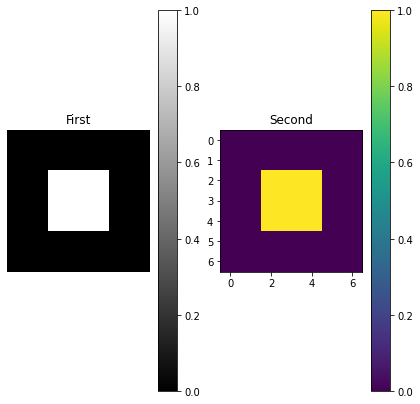

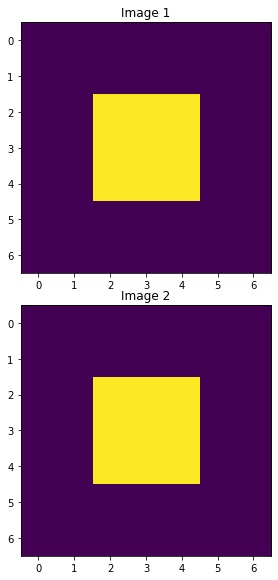

In [ ]:
bright_square = np.zeros((7, 7), dtype=float) # create a zero matrix
bright_square[2:5, 2:5] = 1 # change center values to 1

# Can be created manually or atomatically with a for loop
plt.figure(figsize=(7,7))

plt.subplot(1,2,1, title="First")
plt.imshow(bright_square, cmap="gray")
plt.axis('off')
plt.colorbar()

plt.subplot(1,2,2, title="Second")
plt.imshow(bright_square)
plt.colorbar()

# Or it can be created with a for loop
fig, ax=plt.subplots(ncols=1, nrows=2, figsize=(8, 8))
plt.tight_layout() # nicer layout

# loop to plt.imshow all the images in one row
for i in range(0,2):
  ax[i].imshow(bright_square)
  ax[i].set_title(f'Image {i+1}')

##Creating a brand new folder

In [ ]:
# function to create a folder if doesn't exist

def createDir(path):
  doesExist = os.path.exists(path) # checks whether the specified path exists
  if not doesExist:
    os.makedirs(path) # create path, since it doesn't exist
    print("The new directory was created!")

# create images folder in our folder_path
images_path = f'{folder_path}/images' # your folder you want to create!
createDir(images_path)

##Copying a folder and its subdirectories

In [ ]:
src = '/some/path'
dst = '/other/one'
shutil.copytree(src, dst)

##Histograms

In [ ]:
# computing the histogram of the red channel of an image
img_copy = img.copy()
hist = cv2.calcHist([img_copy],[0],None,[256],[0,256])
# our image, first channel(0=red), no mask, 256 bins, range 0-255
  
# plot the above computed histogram
plt.plot(hist, color='r') # red color for the line
plt.title('Image histogram for the red channel of an image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

##################################

# Plotting multiple channels:
# computing the histogram of all channels of an image
img_copy = img.copy()
  
# plot the above computed histogram
colors = ('r','g','b') # for the line color

for i,color in enumerate(colors):
  hist = cv2.calcHist([img],[i],None,[256],[0,256]) # our image, channel(0/1/2), no mask, 256 bins, range 0-255
  plt.plot(hist, color = color) # r/g/b color for each line
plt.title('Image histogram (RGB) of an image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.show()

#########################################################################

# using plt to plot a histogram (one channel)

hist_with_plt = plt.hist(img[:,:,1].flatten(), bins = 256, color='g') # Selecting the green channel
plt.title('Image histogram (green layer) of an image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

#################

# using plt to plot a histogram (multi channel)

colors = ('r','g','b') # for the line color

# plotting the total histogram, will show up in the back
hist = plt.hist(img.flatten(), bins = 256, color = 'orange') 

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Image histogram (RGB) of an image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

##Converting an image to grayscale

In [ ]:
# First method:
img = io.imread(imgPath, as_gray=True)

# Second method:
img = io.imread(imgPath)
gray_image = skimage.color.rgb2gray(img)

## Operations on images

###Addition

In [ ]:
# First of all, the two images needs to be in the same dimensions and normalized

img1 = io.imread(path1)
img2 = io.imread(path2)

resized1 = cv2.resize(img1, (img2_width,img2_height), interpolation = cv2.INTER_AREA)

addition = img_as_float(resized1) + img_as_float(img2)

###Multlipication

In [ ]:
# Multlipication by a scalar (n > 1) lightens the image

dark_img = io.imread(pathKolsheu)
dark_img = img_as_float(dark_img)

light_img = dark_img * 3

###Division
It is used for dealing with uneven lighting (For example, deleting shadows).

In [ ]:
objects_uneven_lighting = io.imread(o_u_l_path)
uneven_lighting = io.imread(u_l_path)

quotient = objects_uneven_lighting / uneven_lighting # This operation gives you the objects with little to no shadow

If you subtract the uneven lighting from the picture with the uneven lit objects, you get
ASK YEDIDIAH ABOUT THIS
Is it correct to say that we get the object as grayscale without the background?

##Image filtering

###Mean filter

Our original array:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Our convolved array:
 [[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.33 0.67 1.   0.67 0.33 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]


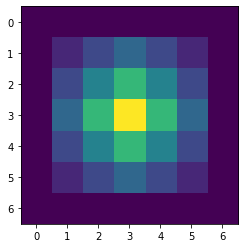

In [ ]:
# defining our mean kernel (3,3) with values of 1/9
mean_kernel = np.full((3, 3), 1/9)

%precision 2
print('Our original array:\n',bright_square)

new = ndi.correlate(bright_square, mean_kernel)
print('\nOur convolved array:\n',new)

plt.imshow(new)

###Pixelating an image
Sampling every n-th pixel

In [ ]:
img = io.imread(somePath)
pixelated = img[0::10, 0::10] # For example - sampling every 10th pixel.

###Gaussian blur
* Blurring is used as a first step before we perform thresholding or edge detection.
* Larger sigma will reduce more noise, though it might remove crucial details from the image.

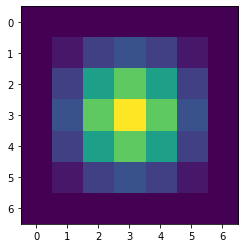

In [ ]:
# Via skimage:
sigma = 1 # For the gaussian filter (Standard deviation for the gaussian curve)
smooth = filters.gaussian(bright_square, sigma)
plt.imshow(smooth)

# Via cv2:
gaussian_using_cv2 = cv2.GaussianBlur(bright_square, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

###Unsharp image
A method for edge enhancing.<br>
We take an unsharp version of an image, and subtract it from the original.

In [ ]:
img = img_as_float(io.imread(image_path, as_gray=True)) # Original
gaussian_img = gaussian(img, sigma=2, mode='constant', cval=0.0) # Creating our blurred version
enhanced_image = img + (img - gaussian_img)*1 # Enhanced image = original + amount * (original - blurred)

###Basic edge filtering

In [ ]:
import math # IMPORTANT! Otherwise you wouldn't be able to use the square root function.

# Vertical/horizontal kernels
vertical_kernel = np.array([
    [-1],
    [ 0],
    [ 1],
])

horizontal_kernel = np.array([
    [-1, 0, 1]
])

# Convolutions
gradient_vertical = ndi.correlate(img.astype(float),
                                  vertical_kernel)
gradient_horizontal = ndi.correlate(img.astype(float),
                                  horizontal_kernel)

# Calculating the magnitude
magnitude = np.zeros((img.shape))
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    magnitude[i][j] = math.sqrt(gradient_horizontal[i][j]**2 + gradient_vertical[i][j]**2)

###Sobel edge detection
The most commonly used edge filter.

In [ ]:
smooth = filters.gaussian(img_as_float(img), sigma=1) # Smoothing is often used as a preprocessing for edge detection
img_edges = filters.sobel(smooth) # should look pretty similar to the basic edge detection method

###Canny edge detection

####The Process of Canny edge detection algorithm can be broken down to 5 different steps: (ALL OF THIS HAAPPENS UNDER THE HOOD)


1.   Apply Gaussian filter to smooth the image in order to remove the noise
2.   Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

In [ ]:
# Applying Canny
canny_edge = cv2.Canny(img, 195, 200)  #Supply Thresholds 1 and 2 

###Denoising filters

####Median filter

In [ ]:
# "structuring element", matrix of ones though corners are zeroes
neighborhood = disk(radius=1)  

# applying the median filter, needs 8 bit, not float.
median = filters.rank.median(img, neighborhood) 

####Bilateral filter
It's not an efficient filter, but it's also an option.

In [ ]:
img = img_as_ubyte(original_img)
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)


####NLM- Non local means
Works well for random gaussian noise, but not for salt and pepper.

In [ ]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True)) # Providing an automated guess of the sigma value

denoised_img= denoise_nl_means(img, h=5 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)

####TVF- Total variation filter

In [ ]:
# First you will need to convert the image to be represented with floats
denoised_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)

###Fourier transformation
Fourier transformation converts an image (or any signal) from spatial (or time) domain to frequency domain. Here's an example with Python.

In [ ]:
# Applying discrete fourier transform 
# notice that cv2.dft takes only float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT) 

#Shift DFT.
# (if we don't shift then the ft will be at the top of the image,
# and won't be seen)
dft_shift = np.fft.fftshift(dft) 

#Calculate magnitude spectrum from the DFT
#Added 1 as we may see 0 values and log of 0 is indeterminate
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)

#As the spatial frequency increases (bars closer), 
#the peaks in the DFT amplitude spectrum move farther away from the origin

plt.imshow(magnitude_spectrum)
plt.title.set_text('FFT of image')

##Segmentation

###Thresholding
Thresholding is a type of image segmenntation, where we change the pixels of an image to make it easier to annalyze. 

####Using histograms

#####Manually


*   Read an image
*   Plot its histogram
*   Choose a Threshold that matches your ROI.
*   Create a boolean mask with the threshold value.





#####Mannually using OpenCV

In [ ]:
#Using opencv to perform manual threshold
# All pixels above 0.55 will have pixel value 1
# Should be exactly same as the above method. 
ret1, thresh1 = cv2.threshold(img, 0.55, 1, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.title('Our mask, using cv2')

#####Auto thresholding using otsu

In [ ]:
# Using cv2 for otsu based automatic thresholding
ret2, thresh2 = cv2.threshold(img_as_ubyte(img),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Threshold value by otsu is: ', ret2)

#####Multi thresholding

In [ ]:
# First, you need to show histogram to see which pixel range
# is good for the ROI.
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')

# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=4)
# We chose classes=4, which results with three values-
# thus, segmenting the image to 4 different regions.

# Digitize (segment) original image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
plt.imshow(regions)

# Looking at a specific region
plt.imshow(regions==3, cmap='gray')

####Entropy
This functioin gives a value that represent the amount of complexity in a certain section of an image, in a relation to a certain structuring element that we choose. 

In [ ]:
# Change the disk size to get better results
entropy_img = entropy(img, disk(7)) 
plt.imshow(entropy_img)

# Thresholding using otsu
plt.hist(entropy_img.flat, bins=100, range=(0,5))
thresh = threshold_otsu(entropy_img)
binary = entropy_img <= thresh

# Filling in the holes (if needed)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8)) # define a kernel (change size if needed)
res = cv2.morphologyEx(img_as_ubyte(binary),cv2.MORPH_OPEN,kernel) # applying the kernel to our binary (make su

# inverting the values, if needed
new_mask = cv2.bitwise_not(res)

# display the results
# if you didn't invert the image, use:
# plt.imshow(res*left_img, cmap='gray')
plt.imshow(new_mask*left_img, cmap='gray')

## Importing python file as module

In [ ]:
# finding the working directory
!pwd # ! interacts with the operating system

In [ ]:
# changing it
%cd /content/drive

In [ ]:
# changing it to where our python scripts are, for example:
%cd /content/drive/MyDrive/71254_2023/01_Lectures/Class06/scripts

In [ ]:
# trying to import the file 'display_img'
import display_image

In [ ]:
path_of_image = '/content/drive/MyDrive/71254_2023/01_Lectures/Class06/images/cucs.jpg' # from the drive
# using a function I wrote within the library
display_image.display_img_from_path(path_of_image) 

## Segmentation continuation

###Watershed

In [ ]:
# pre-processing
img = cv2.imread(f'{images_path}/watershed_coins.jpg') # read image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # bgr to rgb

# mean shift filtering to aid the thresholding step. only for rgb.
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY) # color to gray
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
print(D)
# Now we take D , our distance map, and find peaks (i.e., local maxima) in the map. We’ll ensure that is at least a 20 pixel distance between each peak.
localMax = peak_local_max(D, indices=False, min_distance=10,labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh) #  matrix of labels
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

# loop over the unique labels returned by the Watershed algorithm
total_area = [] # list to store areas of onjects

for i,label in enumerate(np.unique(labels)):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region, and set the pixels belonging to the current label to 255 (white). draw it on the mask.
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255


	# detect contours in the mask and grab the largest one — this contour will represent the outline/boundary of a given object in the image.
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	
	# calc area and append to list
	area = cv2.contourArea(c)
	total_area.append(area)
	print(f'Object number {i} has an area = ', area)
 	
 
	# draw the contours enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)  # We find the circumcircle of an object using the function cv.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.
	cv2.putText(img_rgb, "#{}".format(label), (int(x) - 15 , int(y)), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.7, (0, 0, 255), 2) # draw the ID on the object
	cv2.drawContours(img_rgb, cnts, -1, (0,255,0), 1) # draw the counters
 
# show the output image
plt.imshow(img_rgb)

###Voronoi

In [ ]:
# installing pyclesperanto, a library that enhances our gpu
!pip install pyclesperanto-prototype

In [ ]:
# otsu + vor + labeling


from matplotlib import pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle
from skimage import exposure, img_as_ubyte

#Read the input image
# read an image of cells
img = io.imread(f'{images_path}/cells.jpg', as_gray = True)

# display it
plt.imshow(img, cmap='gray')

#Normalize then scale to 255 and convert to uint8 - using skimage
cells_8bit = img_as_ubyte(img)
plt.imshow(cells_8bit, cmap='gray')

In [ ]:
# preparing our GPU

# list names of all available GPU-devices
print("Available devices:" + str(cle.available_device_names()))

In [ ]:
# select a specific GPU device from the above
device = cle.select_device('Tesla T4')
print("Used GPU: ", device)

#Push the image to gpu memory
cells_gpu = cle.push(cells_8bit)
print("Image size in GPU: " + str(cells_gpu.shape))

# display
cle.imshow(cells_8bit, color_map='gray')

In [ ]:
############ voronoi_otsu_labeling library ##################
# voronoi_otsu_labeling(image, spot_sigma=some_number, outline_sigma=another_number)
#spot_sigma= depends on how close the detected objects can be. Low number may divide large objects into multiple objects.
#outline_sigma = how precise the outline needs to be for the segmented objects (use a low number)
segmented = cle.voronoi_otsu_labeling(cells_gpu, spot_sigma=5, outline_sigma=1)
cle.imshow(segmented, labels=True)

###K-Means

In [ ]:
# K-means segmentation
# applied on RGB image, if you want to apply it to a grayscale image, 
# make sure that you update the proper parameters.

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = output.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(output.shape)

# show the image
plt.title("K-Means Segmentation")
plt.axis('off')
plt.imshow(segmented_image,cmap="gray")
plt.show()

In [ ]:
# taking a look at  the ceneters of each cluster
print(centers)

##Colab forms


In [ ]:
#@title String fields

text = 'How are you doing?' #@param {type:"string"}
dropdown = "Great!" #@param ["Great!", "Ok", "Could be better"]
text_and_dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"] {allow-input: true}

print(text)
print(dropdown)
print(text_and_dropdown)

In [ ]:
#@title Date fields
date_input = '1997-07-14' #@param {type:"date"}

print(date_input)

In [ ]:
#@title Number fields
number_input = 19 #@param {type:"number"}
number_slider = -2.2 #@param {type:"slider", min:-10, max:10, step:0.1}

integer_input = 20 #@param {type:"integer"}
integer_slider = -8 #@param {type:"slider", min:-8, max:100, step:1}

print(number_input)
print(number_slider)

print(integer_input)
print(integer_slider)

In [ ]:
#@title UPLOAD IMAGES HERE: RUN ME.  { display-mode: "form" }
import google

try:
  files = google.colab.files
  uploaded = google.colab.files.upload()
except:
  print("")
  print("Please use Chrome, and enable cookies!")
  print("cookie אנא היכנסו דרך דפדפן כרום במחשב, והפעילו גישה לקבצי ")

# lets the user upload the file, and stores the file name in 'file_names'. The files are uploaded under /content/FILE_NAME
file_names = uploaded.keys() 

In [ ]:
# lets convert our file names into a list of of file names
list_file_paths = list(file_names)
list_file_paths
plt.imshow(io.imread(list_file_paths[0]))
plt.axis('off')

In [ ]:
#@title Downloading files: Example, downloading the first uploaded file above. RUN ME!  { display-mode: "form" }
files.download(list_file_paths[0])

##AruCo marker + MGVRI calculation

In [ ]:
# read an image
image =io.imread(f'{folder_path}/test.jpg')

# making a copy
copy = image.copy()
# Load Aruco detector
parameters = cv2.aruco.DetectorParameters_create()
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)
# Get Aruco marker
corners, _, _ = cv2.aruco.detectMarkers(copy, aruco_dict, parameters=parameters)
# Draw polygon around the marker
int_corners = np.int0(corners)
cv2.polylines(copy, int_corners, True, (0, 255, 0), 10)

# Aruco Area
aruco_area = cv2.contourArea (corners[0])
print('AruCo Area:',aruco_area, 'px')

# Pixel to cm ratio
pixel_cm_ratio = 10*10 / aruco_area# since the AruCo is 10*10 cm, so we devide 100 cm*cm by the number of pixels
print('Ratio - Each pixel is',pixel_cm_ratio, 'cm*cm')

In [ ]:
# Normalizing the image
def normalize(img):
  numerator = img - np.min(img)
  denominator = np.max(img) - np.min(img)
  return numerator / denominator

# Calculating the MGVRI of a given image:
def calc_mgvri(img):
  img = normalize(img)
  green = img[:,:,1] # Getting the green channel
  red = img[:,:,0] # Getting the red channel
  numerator = np.subtract(green*green, red*red)
  denominator = np.add(green*green, red*red)
  np.seterr(invalid='ignore') # ignore 0/0 when dividing
  MGVRI = np.divide(numerator,denominator) # calculating MGVRI according to the formula
  return MGVRI

In [ ]:
mgvried = calc_mgvri(copy)
fig2 = plt.figure(figsize=(7,7)) # Setting the figure size
plt.axis('off') # Turning the axis off

mask = mgvried < 0.2 # Setting a threshold
copy[mask] = -1 # Setting a value of every pixel that didnt make the cut to -1, so that it will be colored white-ish.
plt.imshow(copy, cmap="Greens") # Displaying the masked image.

ticks = [-1.0, -0.5, 0, 0.5, 1.0] # Setting tick values
cb = plt.colorbar(
      orientation = "horizontal",
      ticks = ticks,
        pad = 0) # Changing the location of the colorbar
cb.set_label('MGVRI') # Adding a label to the colorbar

In [ ]:
#counting green pixels
green_counter = len(copy[mask])
print("There are",green_counter,"green pixels\n")

#calculating the aarea both in cm*cm and m*m
area = green_counter*pixel_cm_ratio
print("Area in cm\N{SUPERSCRIPT TWO}:",area)
print("Area in m\N{SUPERSCRIPT TWO}:",area/10000)

## ML

###Tensorflow

In [ ]:
#@title Helper functions for loading image (hidden)

original_image_cache = {}

def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)
  return image

def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image = Image.open(BytesIO(response.content))
  image = preprocess_image(image)
  return image

def load_image(image_url, image_size=256, dynamic_size=False, max_dynamic_size=512):
  """Loads and preprocesses images."""
  # Cache image file locally.
  if image_url in original_image_cache:
    img = original_image_cache[image_url]
  elif image_url.startswith('https://'):
    img = load_image_from_url(image_url)
  else:
    fd = tf.io.gfile.GFile(image_url, 'rb')
    img = preprocess_image(Image.open(fd))
  original_image_cache[image_url] = img
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img_raw = img
  if tf.reduce_max(img) > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  if not dynamic_size:
    img = tf.image.resize_with_pad(img, image_size, image_size)
  elif img.shape[1] > max_dynamic_size or img.shape[2] > max_dynamic_size:
    img = tf.image.resize_with_pad(img, max_dynamic_size, max_dynamic_size)
  return img, img_raw

def show_image(image, title=''):
  image_size = image.shape[1]
  w = (image_size * 6) // 320
  plt.figure(figsize=(w, w))
  plt.imshow(image[0], aspect='equal')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [ ]:
#@title Select an Image Classification model

image_size = 224
dynamic_size = False

model_name = "resnet_v2_152" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/classification/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/classification/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/classification/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/classification/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/classification/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/classification/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/classification/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/classification/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/classification/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/classification/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/classification/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/classification/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/classification/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/ilsvrc2012_classification/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/classification/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/classification/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/classification/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "mobilenet_v2_100_224": 224,
  "mobilenet_v2_130_224": 224,
  "mobilenet_v2_140_224": 224,
  "nasnet_large": 331,
  "nasnet_mobile": 224,
  "pnasnet_large": 331,
  "resnet_v1_50": 224,
  "resnet_v1_101": 224,
  "resnet_v1_152": 224,
  "resnet_v2_50": 224,
  "resnet_v2_101": 224,
  "resnet_v2_152": 224,
  "mobilenet_v3_small_100_224": 224,
  "mobilenet_v3_small_075_224": 224,
  "mobilenet_v3_large_100_224": 224,
  "mobilenet_v3_large_075_224": 224,
}

model_handle = model_handle_map[model_name]

print(f"Selected model: {model_name} : {model_handle}")


max_dynamic_size = 512
if model_name in model_image_size_map:
  image_size = model_image_size_map[model_name]
  dynamic_size = False
  print(f"Images will be converted to {image_size}x{image_size}")
else:
  dynamic_size = True
  print(f"Images will be capped to a max size of {max_dynamic_size}x{max_dynamic_size}")

labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"

#download labels and creates a maps
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]


In [ ]:
#@title Select an Input Image

image_name = "flamingo" # @param ['tiger', 'bus', 'car', 'cat', 'dog', 'apple', 'banana', 'turtle', 'flamingo', 'piano', 'honeycomb', 'teapot']

images_for_test_map = {
    "tiger": "https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg",
    #by Charles James Sharp, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "bus": "https://upload.wikimedia.org/wikipedia/commons/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg",
    #by Martin49 from London, England, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "car": "https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg",
    #by EurovisionNim, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons
    "cat": "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg",
    #by Alvesgaspar, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "dog": "https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg",
    #by Craig Pemberton, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "apple": "https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg",
    #by Abhijit Tembhekar from Mumbai, India, CC BY 2.0 <https://creativecommons.org/licenses/by/2.0>, via Wikimedia Commons
    "banana": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bananas_white_background.jpg",
    #by fir0002  flagstaffotos [at] gmail.com		Canon 20D + Tamron 28-75mm f/2.8, GFDL 1.2 <http://www.gnu.org/licenses/old-licenses/fdl-1.2.html>, via Wikimedia Commons
    "turtle": "https://upload.wikimedia.org/wikipedia/commons/8/80/Turtle_golfina_escobilla_oaxaca_mexico_claudio_giovenzana_2010.jpg",
    #by Claudio Giovenzana, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "flamingo": "https://upload.wikimedia.org/wikipedia/commons/b/b8/James_Flamingos_MC.jpg",
    #by Christian Mehlführer, User:Chmehl, CC BY 3.0 <https://creativecommons.org/licenses/by/3.0>, via Wikimedia Commons
    "piano": "https://upload.wikimedia.org/wikipedia/commons/d/da/Steinway_%26_Sons_upright_piano%2C_model_K-132%2C_manufactured_at_Steinway%27s_factory_in_Hamburg%2C_Germany.png",
    #by "Photo: © Copyright Steinway & Sons", CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons
    "honeycomb": "https://upload.wikimedia.org/wikipedia/commons/f/f7/Honey_comb.jpg",
    #by Merdal, CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons
    "teapot": "https://upload.wikimedia.org/wikipedia/commons/4/44/Black_tea_pot_cropped.jpg",
    #by Mendhak, CC BY-SA 2.0 <https://creativecommons.org/licenses/by-sa/2.0>, via Wikimedia Commons
}

img_url = images_for_test_map[image_name]
image, original_image = load_image(img_url, image_size, dynamic_size, max_dynamic_size)
show_image(image, 'Scaled image')

In [ ]:
# loading the model with tf and inserting an initial input
classifier = hub.load(model_handle)

input_shape = image.shape
warmup_input = tf.random.uniform(input_shape, 0, 1.0)
%time warmup_logits = classifier(warmup_input).numpy()

In [ ]:
# Run model on image, creating the top 5 classifications and its probabilities
%time probabilities = tf.nn.softmax(classifier(image)).numpy()

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()
np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5][i]}'
  print(line)

show_image(image, '')

In [ ]:
# If you want to switch models, you will need to restart the runtime

# instll the dependencies
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

In [ ]:
# load the model
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

In [ ]:
# libs
from google.colab import files
from matplotlib import pyplot as plt
from skimage import io

# upload an image - you can try 'citrus.jpg' from /Class10/images
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = io.imread(img_path)
plt.imshow(img)

In [ ]:
# List of links to images
#imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(img) # accepts URL, Filename, PIL, OpenCV, Numpy..

# Results
#results.print()
results.show()  # or .save()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)



###Mask RCNN

####Some things that needs to be done before:

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install -U -qq tensorflow==2.5.0
exit() # Runtime restart required!

In [ ]:
# batch rename files script
# use it, if you downloaded a lot of images from google, and you want to rename them from img0 to img100 for example

# Python 3 code to rename multiple
# files in a directory or folder

# importing os module
import os

# Function to rename multiple files
def main():

	folder = "/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/dataset/test"
	for count, filename in enumerate(os.listdir(folder)):
		dst = f"image{str(count)}.jpg"
		src =f"{folder}/{filename}" # foldername/filename, if .py file is outside folder
		dst =f"{folder}/{dst}"
		
		# rename() function will
		# rename all the files
		os.rename(src, dst)

# Driver Code
if __name__ == '__main__':
	
	# Calling main() function
	main()


In [ ]:
# cloning the MASK-RCNN repo
!git clone https://github.com/kairess/Mask_RCNN

In [ ]:
# import libs
import os
import sys
import json
import numpy as np
import time
from PIL import Image, ImageDraw

ROOT_DIR = 'Mask_RCNN'

sys.path.append(ROOT_DIR) 
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib

In [ ]:
# Download the pretrained model
# This will default to sub-directories in your mask_rcnn_dir, but if you want them somewhere else, updated it here.

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [ ]:
class TrainConfig(Config):
    # Give the configuration a recognizable name
    NAME = "custom"

    # Train on 1 GPU and 1 image per GPU. Batch size is 1 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 5

    LEARNING_RATE = 0.001

    # Number of classes (including background) - IMPORTANT TO CHANGE ACCORDING TO YOUR LABELS IN YOUR JSON
    NUM_CLASSES = 1 + 1  # background + 1 (flowers)

    # All of our training images are 1920x1012
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
    # Matterport originally used resnet101, but I downsized to fit it on my graphics card
    BACKBONE = 'resnet50' # resnet50

    # To be honest, I haven't taken the time to figure out what these do
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = TrainConfig()
config.display()

In [ ]:
class CocoLikeDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
                
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
        
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids

In [ ]:
root_folder = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn'

dataset_train = CocoLikeDataset()
dataset_train.load_data(f'{root_folder}/dataset/train.json', f'{root_folder}/dataset/train/')
dataset_train.prepare()

dataset_val = CocoLikeDataset()
dataset_val.load_data(f'{root_folder}/dataset/val.json', f'{root_folder}/dataset/val/')
dataset_val.prepare()

image_ids = np.random.choice(dataset_train.image_ids, 4)

print('Train', len(dataset_train.image_ids))
print('Validation', len(dataset_val.image_ids))

for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
dataset_train.class_names

In [ ]:
model = modellib.MaskRCNN(
    mode="training",
    config=config,
    model_dir=MODEL_DIR)

model.load_weights(
    COCO_MODEL_PATH,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
start_train = time.time()

model.train(
    dataset_train,
    dataset_val, 
    learning_rate=config.LEARNING_RATE, 
    epochs=30, 
    layers='heads')

end_train = time.time()
minutes = round((end_train - start_train) / 60, 2)

print(f'Training took {minutes} minutes')

In [ ]:
# download the trained model to disk

import shutil

original = r'/content/Mask_RCNN/logs/custom20221228T1436/mask_rcnn_custom_0030.h5'
target = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class10/mask_rcnn/mask_rcnn_custom_0030_28122022_flowers.h5'

shutil.copyfile(original, target)

In [ ]:
class InferenceConfig(TrainConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.65 # CHANGE HERE IF YOU WANT

inference_config = InferenceConfig()

# Recreate the model in inference mode
test_model = modellib.MaskRCNN(
    mode="inference", 
    config=inference_config,
    model_dir=MODEL_DIR)

model_path = test_model.find_last()
print(model_path)

test_model.load_weights(model_path, by_name=True)

In [ ]:
import skimage

mask_colors = [
    (0., 0., 0.), # Background
    (1., 0., 0.), # Red
    (0., 1., 0.)  # Green
]

real_test_dir = f'{root_folder}/dataset/test'
image_paths = []

for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)

    results = test_model.detect([img_arr], verbose=1)
    r = results[0]

    colors = tuple(np.take(mask_colors, r['class_ids'], axis=0))

    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_val.class_names, r['scores'], figsize=(16, 8),
                                colors=colors)